# Breast Cancer Detection model

The goal of this project is to build a classification model that can accurately predict whether a tumor in a sample of breast tissue is cancerous or not. Not all tumors are necessarily cancerous- they are either benign (not cancerous) or malignant (cancerous). The dataset that will be used to train this model is obtained from the University of Wisconsin and is available at the following link: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original).

The dataset has 10 independent variables relating to the breast tissue tumor: clump thickness, cell size uniformity, cell shape uniformity, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli, and mitoses. All independent variables are measured on a scale of 1-10. These variables will all help the model classify the tumor into one of two classes: 2 (benign) and 4 (malignant). 

Multiple classification algorithms will be used and the model with the most accuracy will be used as the final one. 

## Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

If one is trying to run this model on their own, they should access the excel csv file provided in the repository and upload its location on their computer device onto the appropriate location below.

In [18]:
dataset = pd.read_csv('C:\\Users\\momoa\\OneDrive\\Desktop\\breast_cancerdata.csv')
x= dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [19]:
print(x[0:5])

print(y[0:5])

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]]
[2 2 2 2 2]


## Splitting the dataset into the training and testing set

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)

## Feature Scaling

This is essentially normalization. Some of the models that will be used such as K-Nearest Neighbours and Kernel SVM will require this.

In [21]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
xtrain = scx.fit_transform(xtrain)
xtest = scx.transform(xtest)

## Training the models on the dataset:

### Kernel SVM

In [29]:
from sklearn.svm import SVC
cl = SVC(kernel = 'rbf', random_state= 42)
cl.fit(xtrain, ytrain)
ypred = cl.predict(xtest)

In [31]:
accuracies = cross_val_score(estimator = cl, X = xtrain, y = ytrain, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.28 %
Standard Deviation: 2.55 %


### K-Nearest Neighbours

In [32]:
from sklearn.neighbors import KNeighborsClassifier
cl = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p=2)
cl.fit(xtrain, ytrain)

KNeighborsClassifier()

In [33]:
accuracies = cross_val_score(estimator = cl, X = xtrain, y = ytrain, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.29 %
Standard Deviation: 1.85 %


### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
cl = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
cl.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [35]:
accuracies = cross_val_score(estimator = cl, X = xtrain, y = ytrain, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.31 %
Standard Deviation: 2.18 %


### Random Tree

In [36]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
cl.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [37]:
accuracies = cross_val_score(estimator = cl, X = xtrain, y = ytrain, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.89 %
Standard Deviation: 2.55 %


### Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
cl = GaussianNB()
cl.fit(xtrain, ytrain)

GaussianNB()

In [40]:
accuracies = cross_val_score(estimator = cl, X = xtrain, y = ytrain, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.89 %
Standard Deviation: 2.23 %


### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
cl = LogisticRegression(random_state=42)
cl.fit(xtrain, ytrain)

LogisticRegression(random_state=42)

In [43]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = cl, X = xtrain, y = ytrain, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.87 %
Standard Deviation: 2.00 %


As one can see, the logistic regression model had the highest accuracy with 96.87% and the second lowest standard deviation of 2.00%. Thus, will be the model used on new data.

## Predicting a new result with the logistic regression model

The first column is what the model predicted and the second column is the actual result.

In [44]:
ypred = cl.predict(xtest)
concatenation = np.concatenate((ypred, ytest), 0)
concatenation = np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest), 1)), 1)
print(concatenation[0:20])

[[4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]]


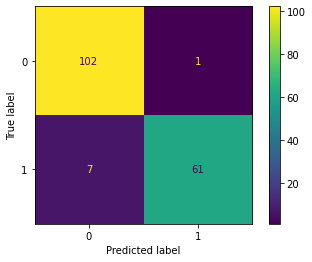

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(ytest, ypred)
ConfusionMatrixDisplay(cm).plot()

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9532163742690059

The logistic regression model had an excellent 95.3% accuracy with the testing set. It had 7 False positive/type I errors, and only 1 false negative/type II error.

## Predicting a new result

Here is how the model would be used if one wanted to hypothetically determine the malignancy of a tumor tissue with the following variables:

clump thickness: 6

cell size uniformity: 9

cell shape uniformity: 2

marginal adhesion: 3

single epithelial cell size: 5

bare nuclei: 10

bland chromatin: 3

normal nucleoli: 2

mitoses: 1

In [49]:
print(cl.predict([[6,9,2,3,5,10,3,2,1]]))

[4]


This hypothetical tissue would most likely have a malignant/cancerous tumor.